In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 48s 4us/step


In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

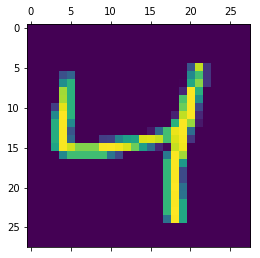

In [10]:
plt.matshow(x_train[2])

In [11]:
y_train[2]

4

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
x_train =  x_train/255
x_test  =  x_test/255

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
digit =   x_train.reshape(len(x_train),28*28)
digit.shape

(60000, 784)

In [22]:
digit_test = x_test.reshape(len(x_test),28*28)
digit_test.shape

(10000, 784)

In [23]:
digit[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [30]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(digit, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 2ms/step - loss: 0.7305 - accuracy: 0.8092
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3058 - accuracy: 0.9138
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2782 - accuracy: 0.9223
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2664 - accuracy: 0.9263
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2626 - accuracy: 0.9265


In [31]:
model.evaluate(digit_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.9269


[0.269855260848999, 0.9269000291824341]

In [32]:
model.predict(digit_test)

array([[2.5723070e-02, 4.6738222e-07, 8.5955173e-02, ..., 9.9980599e-01,
        9.5303625e-02, 6.3865769e-01],
       [3.9169598e-01, 4.2236149e-03, 9.9859309e-01, ..., 5.7102072e-13,
        1.3228378e-01, 2.8454907e-09],
       [3.5849214e-04, 9.9274457e-01, 6.2073356e-01, ..., 1.2326601e-01,
        3.8212883e-01, 3.9718956e-02],
       ...,
       [2.6974926e-06, 4.3814289e-06, 1.4600158e-03, ..., 2.3314425e-01,
        5.2872729e-01, 7.2737277e-01],
       [8.7711764e-05, 1.6829371e-04, 8.6645508e-05, ..., 2.9050412e-05,
        6.1293560e-01, 6.3719905e-05],
       [4.9622953e-03, 3.4261996e-10, 2.4683028e-01, ..., 6.9053203e-09,
        2.1898746e-04, 4.6247041e-07]], dtype=float32)

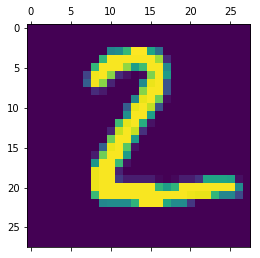

In [46]:
plt.matshow(x_test[1])

In [47]:
y_predict = model.predict(digit_test)
y_predict[1]

array([3.9169598e-01, 4.2236149e-03, 9.9859309e-01, 3.1321561e-01,
       7.2792650e-10, 8.3893621e-01, 7.8086162e-01, 5.7102072e-13,
       1.3228378e-01, 2.8454907e-09], dtype=float32)

In [48]:
np.argmax(y_predict[1])

2

In [50]:
y_prediction_labels = [np.argmax(i) for i in y_predict]
y_prediction_labels[:5]

[7, 2, 1, 0, 4]

In [49]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [51]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediction_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   3,    9,  927,   15,   10,    7,   11,    9,   37,    4],
       [   4,    0,   20,  905,    3,   40,    2,   10,   18,    8],
       [   1,    1,    6,    1,  932,    0,    8,    3,    9,   21],
       [   8,    2,    4,   17,   11,  801,   13,    2,   28,    6],
       [   9,    3,    8,    1,    8,   16,  908,    2,    3,    0],
       [   1,    5,   26,    7,   11,    1,    0,  950,    2,   25],
       [   6,    8,    5,   16,   11,   34,    9,   10,  868,    7],
       [   9,    7,    2,    7,   48,    8,    0,   21,    6,  901]])>

Text(69.0, 0.5, 'Truth')

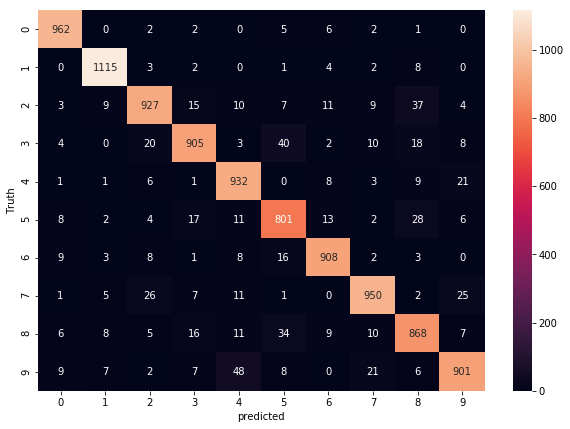

In [52]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [54]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(digit, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4437 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1292 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0860 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0628 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9852


In [55]:
model.evaluate(digit_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9776


[0.08035317063331604, 0.9775999784469604]